<div style="text-align: center;">
    <h1 style="color: #FF8C00;">Recap from last class</h1>
    <h1 style="color: #FF6347;">Machine Learning: Linear Regression II</h1>
    <img src="https://media3.giphy.com/media/v1.Y2lkPTc5MGI3NjExMzdmbHNyOTI4cGxzZGdxOGtwcDEzeGQzcmNrNGhjY3VzeXlpOXpxdCZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/ne3xrYlWtQFtC/giphy.gif" width="300">
</div>

In [191]:
# 📚 Basic Libraries
import pandas as pd
import numpy as np

# 📊 Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# 🤖 Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, root_mean_squared_error

### BASELINE MODEL

In [192]:
data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/Boston_Housing/Training_set_boston.csv")
df = data.copy()
df.columns = df.columns.str.lower().str.replace(" ", "_")
X = df.drop("medv", axis=1)
y = df["medv"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # train-test split
model = LinearRegression() # ma model
model.fit(X_train,y_train) # Train the model
predictions = model.predict(X_test) # Make predictions on the test dataset
r2_3 = r2_score(y_test, predictions)
RMSE_3 = root_mean_squared_error(y_test, predictions)
MSE_3 = mean_squared_error(y_test, predictions)
MAE_3 = mean_absolute_error(y_test, predictions)
print(f"Model Metrics: | R2 = {round(r2_3, 4)} | RMSE = {round(RMSE_3, 4)} | MAE = {round(MAE_3, 4)} | MSE = {round(MSE_3, 4)} |")

Model Metrics: | R2 = 0.7011 | RMSE = 4.8527 | MAE = 3.2305 | MSE = 23.549 |


### ASSUMPTIONS

- **Linearity**: The relationship between the independent variables and the dependent variable is linear. This can be checked using scatter plots or partial regression plots.

- **Normality of Residuals**: The error terms (residuals) of the model are normally distributed. This assumption can be checked using a Q-Q plot or statistical tests like the Shapiro-Wilk test.

- **No multicollinearity**: Independent variables are not too highly correlated. High correlation between predictors can lead to unstable estimates of regression coefficients. This can be checked using Variance Inflation Factor (VIF) scores.

<h1 style="color: #FF8C00;">Stuff to check and do </h1>

In [193]:
df = data.copy()

In [194]:
df.columns = df.columns.str.lower().str.replace(" ", "_")

In [195]:
# df.dtypes

In [196]:
# df.isnull().sum()

In [197]:
# df.duplicated().sum()

In [198]:
# df.eq(" ").sum()

In [199]:
# df.nunique()

In [200]:
# df.chas.value_counts()

- **Linearity**: The relationship between the independent variables and the dependent variable is linear. This can be checked using scatter plots or partial regression plots.

In [201]:
# df.corrwith(df["medv"]).sort_values(ascending=False)

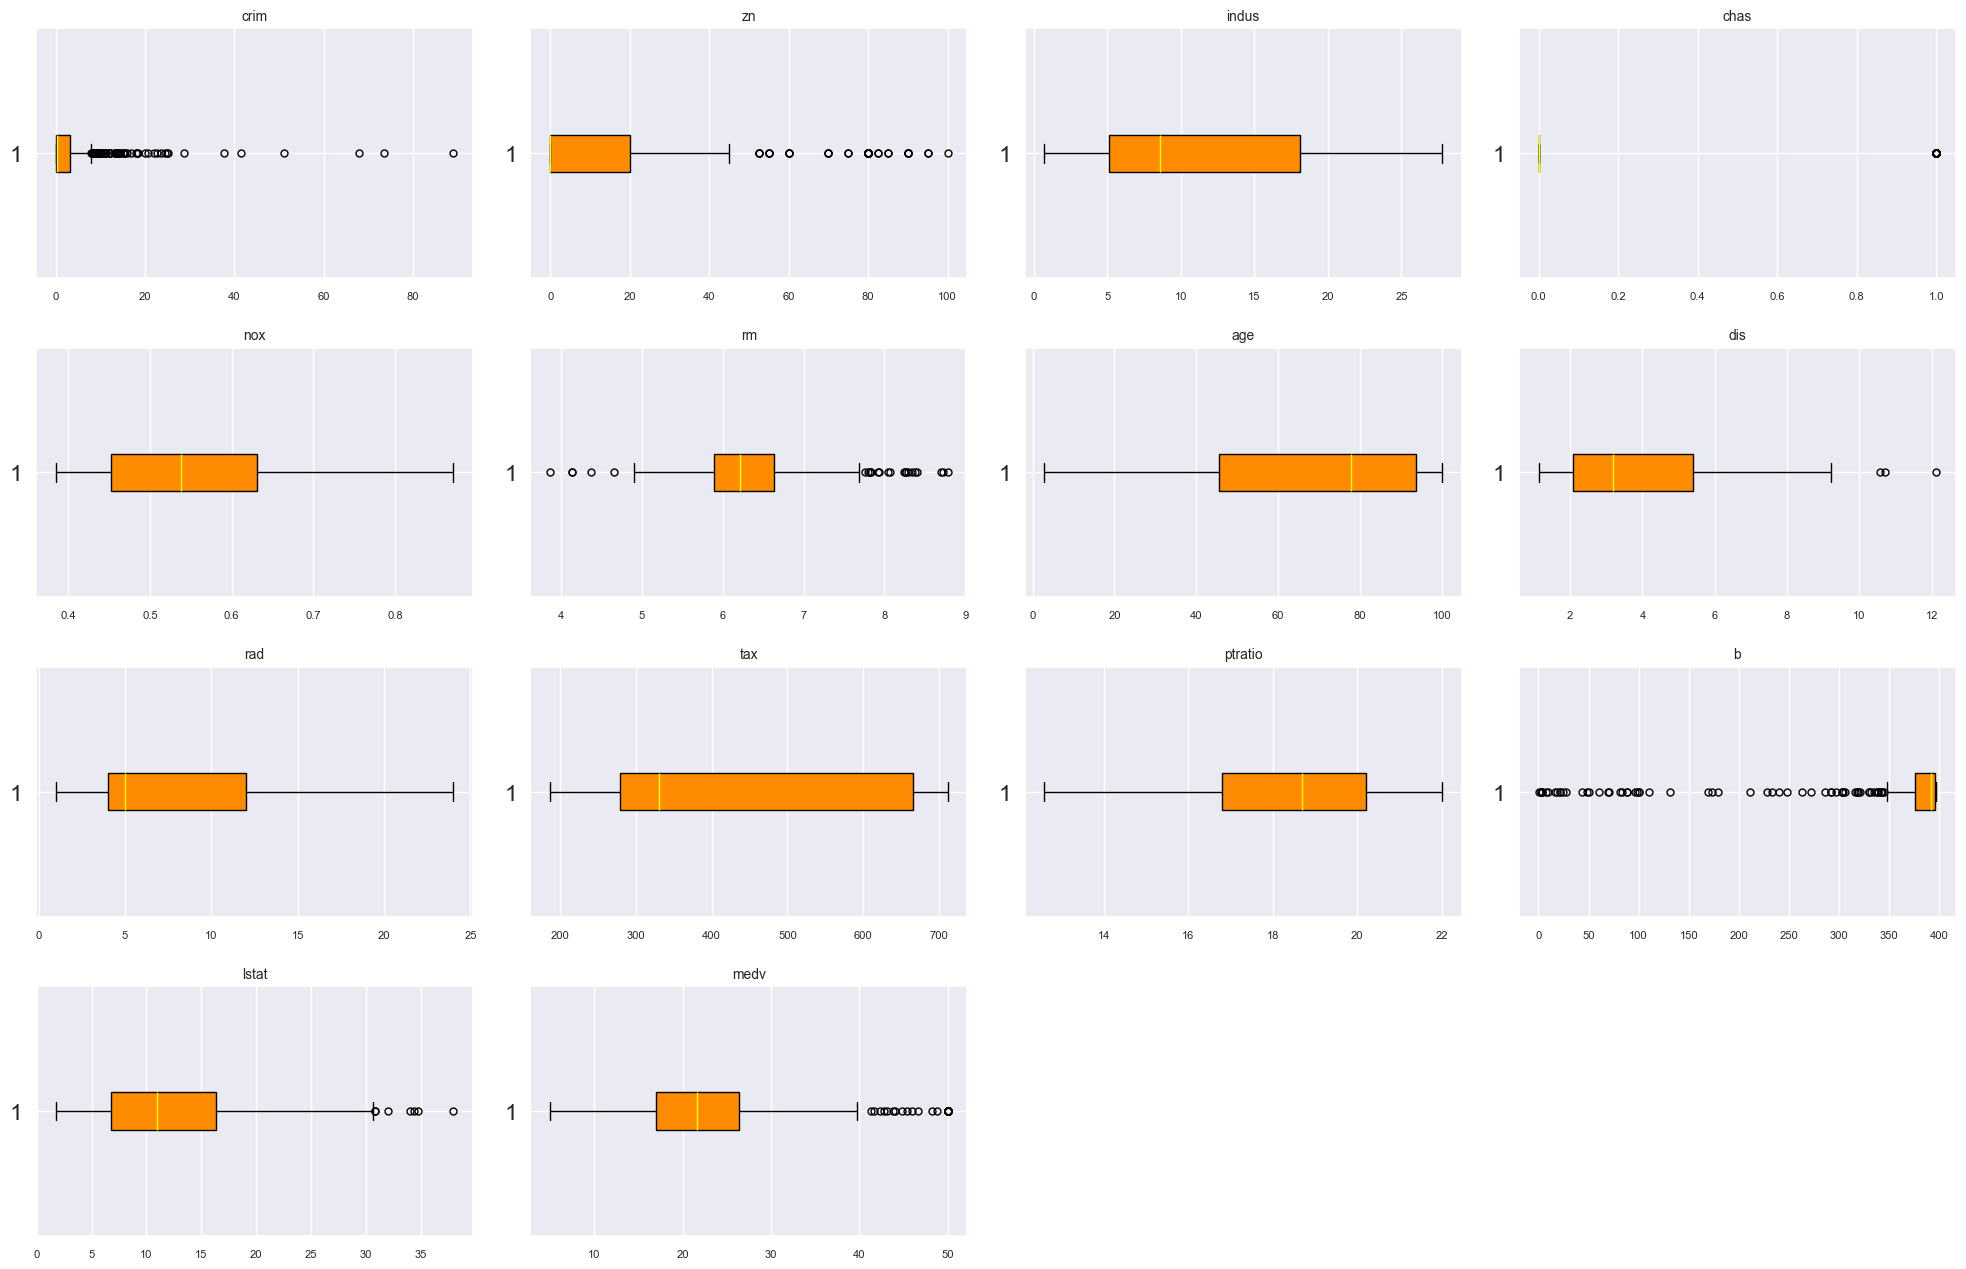

In [202]:
color = '#FF8C00'

# grid size
nrows, ncols = 5, 4 

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

for i, ax in enumerate(axes):
    if i >= len(df.columns):
        ax.set_visible(False)
        continue
    ax.boxplot(df.iloc[:, i].dropna(), vert=False, patch_artist=True, 
               boxprops=dict(facecolor=color, color='black'), 
               medianprops=dict(color='yellow'), whiskerprops=dict(color='black'), 
               capprops=dict(color='black'), flierprops=dict(marker='o', color='red', markersize=5))
    ax.set_title(df.columns[i], fontsize=10)
    ax.tick_params(axis='x', labelsize=8)

plt.tight_layout()
plt.show()

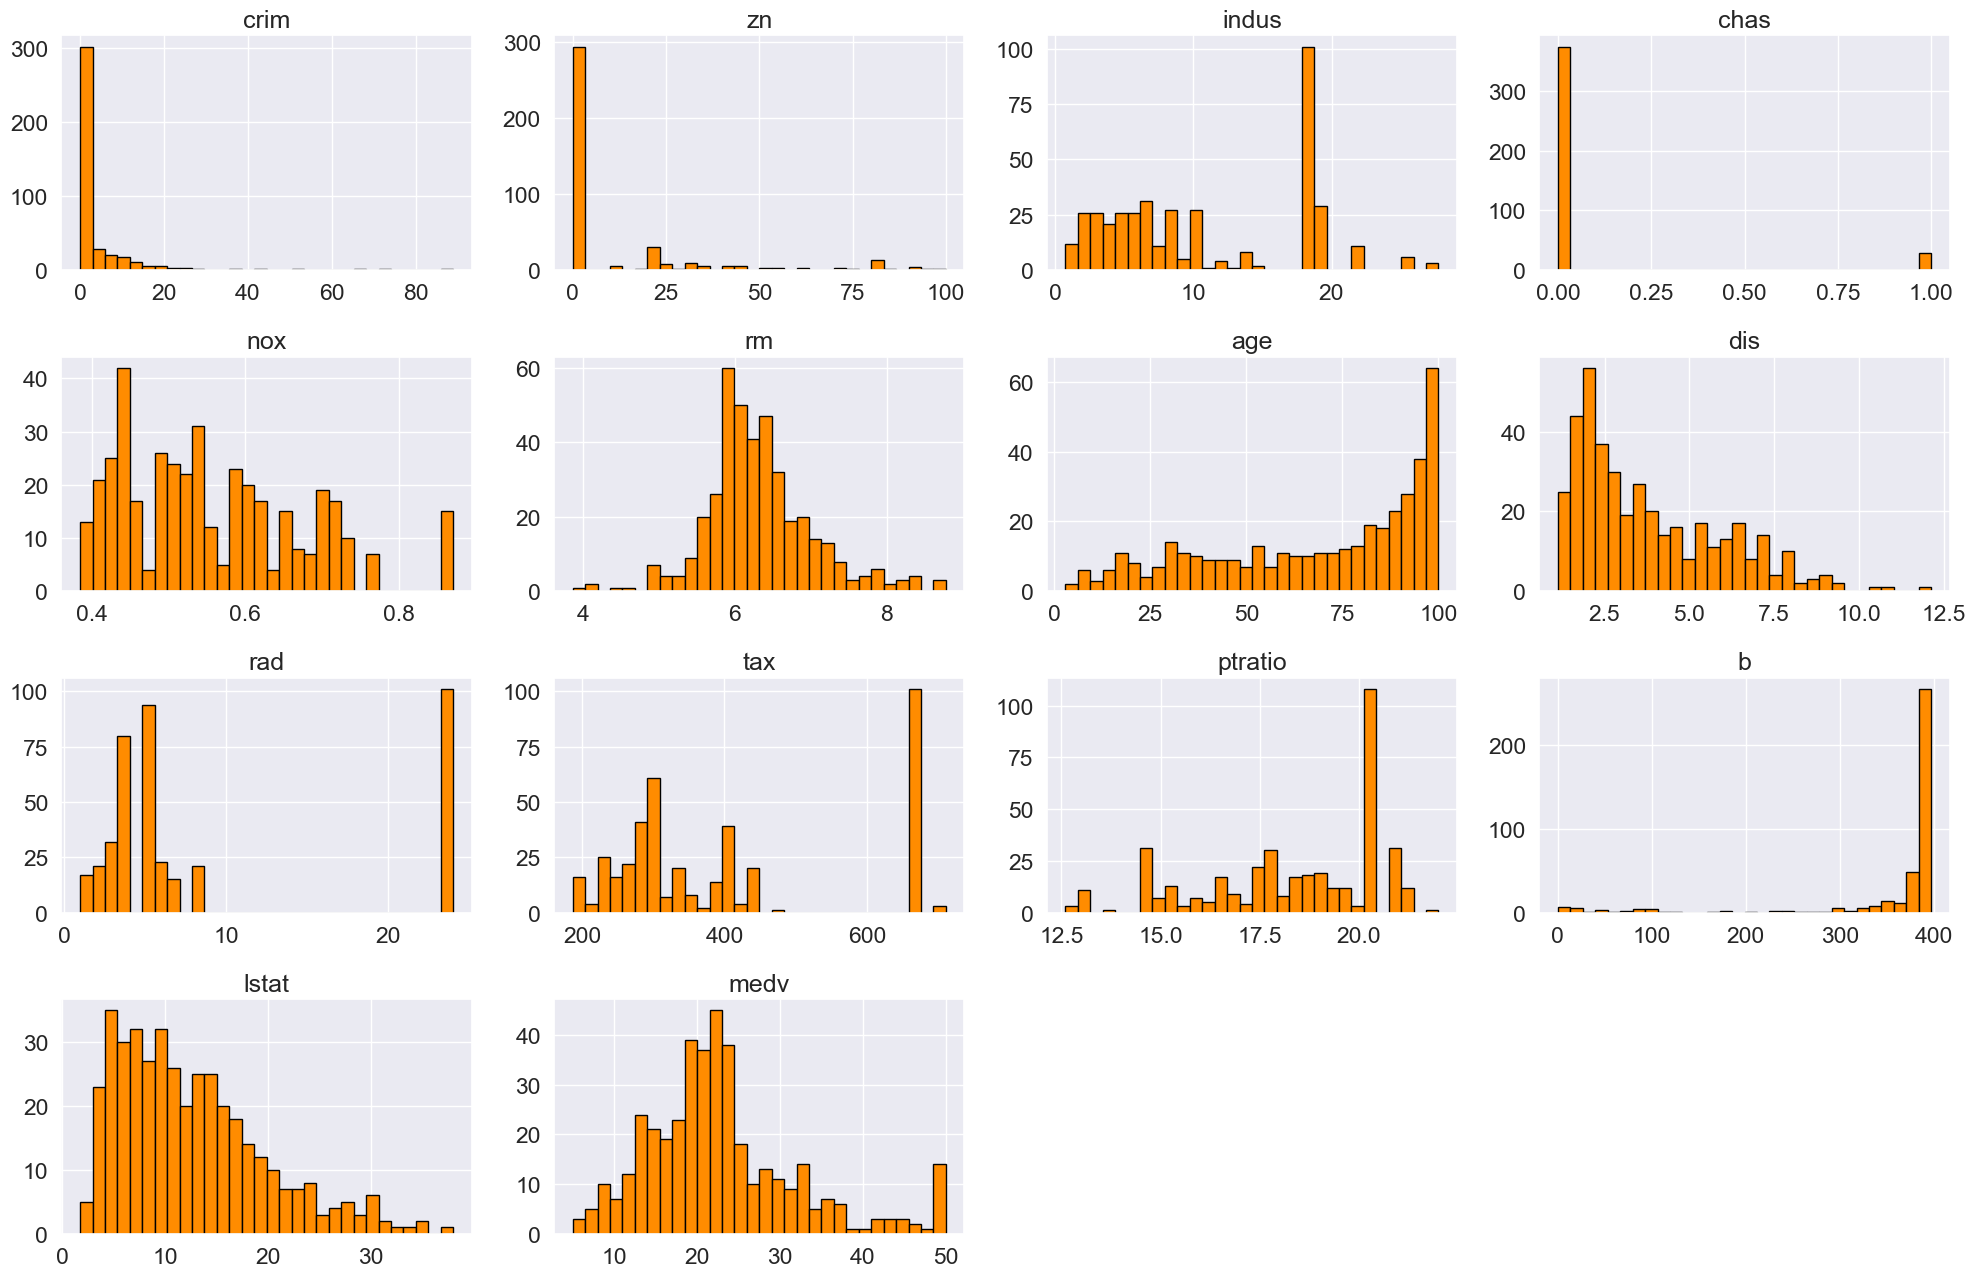

In [203]:
color = '#FF8C00'

# grid size
nrows, ncols = 5, 4  # adjust for your number of features

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

# Plot each numerical feature
for i, ax in enumerate(axes):
    if i >= len(df.columns):
        ax.set_visible(False)  # hide unesed plots
        continue
    ax.hist(df.iloc[:, i], bins=30, color=color, edgecolor='black')
    ax.set_title(df.columns[i])

plt.tight_layout()
plt.show()

In [204]:
# df.corrwith(df["medv"]).sort_values(ascending=False)

<h1 style="color: #FF8C00;">Dealing with Multicollinearity</h1>

- **No multicollinearity**: Independent variables are not too highly correlated. High correlation between predictors can lead to unstable estimates of regression coefficients. This can be checked using Variance Inflation Factor (VIF) scores.

In [205]:
num_corr = round(df.corr(), 2) # correlation matrix

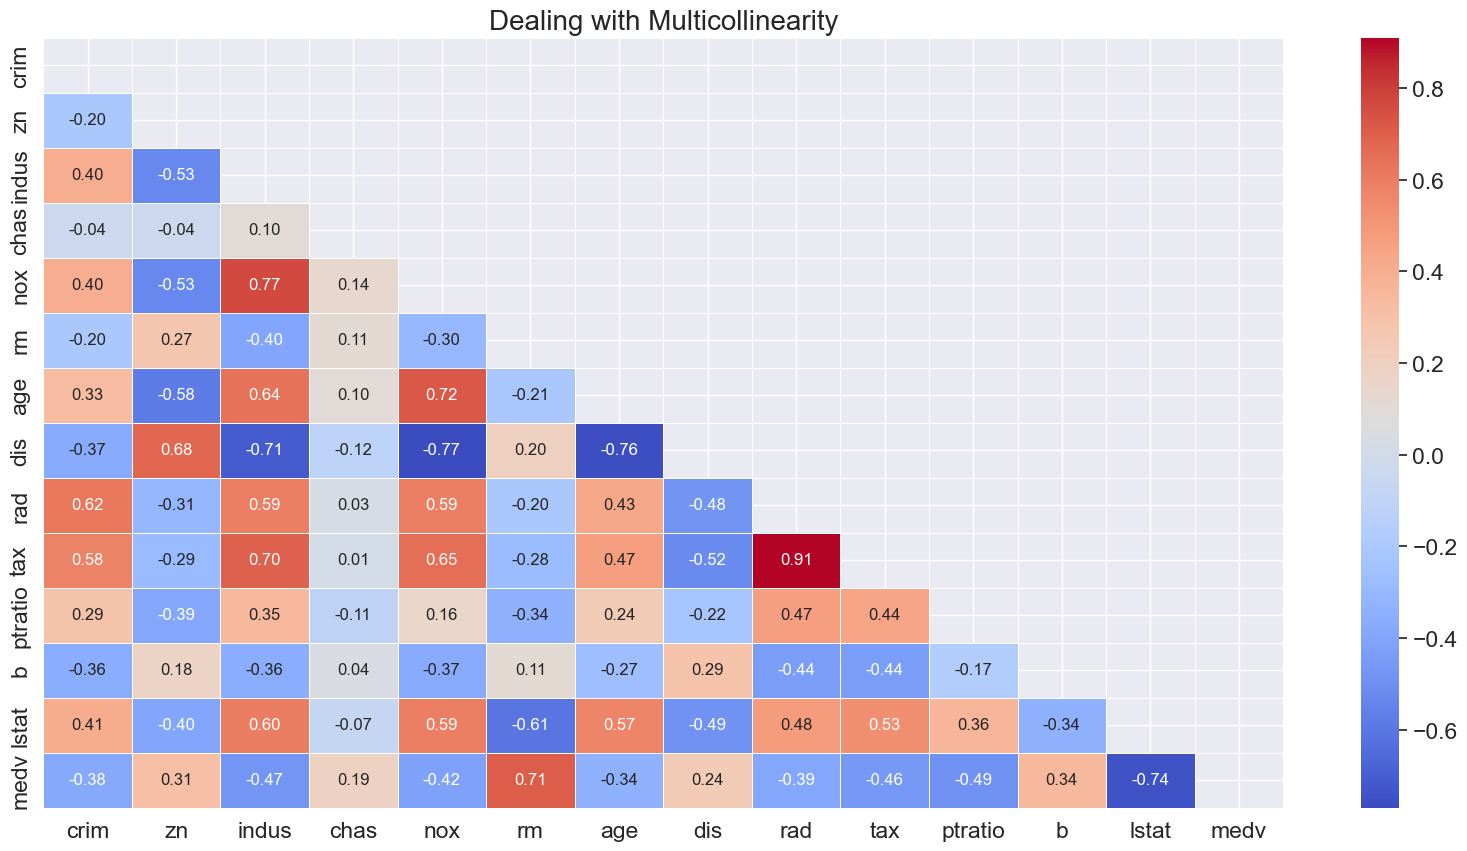

In [206]:
# Correlation Matrix-Heatmap Plot
mask = np.zeros_like(num_corr)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

f, ax = plt.subplots(figsize=(20, 10))
sns.set(font_scale=1.5) # increase font size

ax = sns.heatmap(num_corr, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="coolwarm", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Dealing with Multicollinearity", fontsize=20) # add title
plt.show()

<h1 style="color: #FF8C00;">Modeling</h1>

<h2 style="color: #FF6347;">X-y Split</h2>

In [207]:
X = df.drop(columns="medv")
y = df.medv

<h2 style="color: #FF6347;">Train-Test Split</h2>

In [208]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LinearRegression()

<h2 style="color: #FF6347;">Training & Predictions</h2>

In [209]:
model.fit(X_train, y_train)
predictions = model.predict(X_test)

<h2 style="color: #FF6347;">Model Validation</h2>

<h3 style="color: #FF6347;">Metrics</h3>

In [210]:
r2_3 = r2_score(y_test, predictions)
RMSE_3 = mean_squared_error(y_test, predictions, squared=False)
MSE_3 = mean_squared_error(y_test, predictions)
MAE_3 = mean_absolute_error(y_test, predictions)

/opt/anaconda3/envs/ironhack/lib/python3.13/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [211]:
#Printing the results
print("R2 = ", round(r2_3, 4))
print("RMSE = ", round(RMSE_3, 4))
print("MSE =  ", round(MSE_3, 4)) 
print("MAE = ", round(MAE_3, 4))

R2 =  0.7011
RMSE =  4.8527
MSE =   23.549
MAE =  3.2305


<h1 style="color: #FF8C00;">Metric interpretation</h1>

**Similarities:** [$^{[3]}$](https://archive.is/20230531192343/https://medium.com/human-in-a-machine-world/mae-and-rmse-which-metric-is-better-e60ac3bde13d)
> - Both MAE and RMSE express average model prediction error in units of the variable of interest. 
> - Both metrics can range from 0 to ∞ and are indifferent to the direction of errors. 
> - They are negatively-oriented scores, which means lower values are better.

**Differences:** [$^{[3]}$](https://archive.is/20230531192343/https://medium.com/human-in-a-machine-world/mae-and-rmse-which-metric-is-better-e60ac3bde13d)
> - MAE is a measure of **average error**, whereas RMSE is a measure of the **variance of the error frequency distribution**

<h1 style="color: #FF8C00;">Now, experiment with different models</h1>

<h2 style="color: #FF6347;">Selecting the Model: Ridge Regression</h2>

Ridge Regression is a type of linear regression that includes a regularization term. The regularization term helps to prevent overfitting by adding a penalty to the size of the coefficients. The Ridge Regression equation is:

$$
Y = a + bX + \lambda \sum_{i=1}^{n} b_i^2
$$

where:
- $Y$ is the dependent variable,
- $a$ is the intercept,
- $b$ is the slope,
- $X$ is the independent variable,
- $\lambda$ is the regularization parameter.

The regularization parameter $\lambda$ controls the strength of the penalty. When $\lambda = 0$, Ridge Regression is equivalent to Linear Regression. As $\lambda$ increases, the penalty for large coefficients increases, which can help to reduce overfitting.

In [212]:
from sklearn.linear_model import Ridge

In [213]:
model = Ridge()

In [214]:
model.fit(X_train, y_train)

Ridge()

In [215]:
predictions_ridge = model.predict(X_test)

<h2 style="color: #FF6347;">Model Validation</h2>

<h3 style="color: #FF6347;">Metrics</h3>

In [216]:
r2_3_2 = r2_score(y_test, predictions_ridge)
RMSE_3_2 = mean_squared_error(y_test, predictions_ridge, squared=False)
MSE_3_2 = mean_squared_error(y_test, predictions_ridge)
MAE_3_2 = mean_absolute_error(y_test, predictions_ridge)

/opt/anaconda3/envs/ironhack/lib/python3.13/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [217]:
#Printing the results
print("R2 = ", round(r2_3_2, 4))
print("RMSE = ", round(RMSE_3_2, 4))
print("The value of the metric MSE is ", round(MSE_3_2, 4))
print("MAE = ", round(MAE_3_2, 4))

R2 =  0.6977
RMSE =  4.8801
The value of the metric MSE is  23.8149
MAE =  3.2091


<h2 style="color: #FF6347;">Selecting the Model: Lasso Regression</h2>

Lasso Regression is a type of linear regression that includes a regularization term. The regularization term helps to prevent overfitting by adding a penalty to the size of the coefficients. The Lasso Regression equation is:

$$
Y = a + bX + \lambda \sum_{i=1}^{n} |b_i|
$$

where:
- $Y$ is the dependent variable,
- $a$ is the intercept,
- $b$ is the slope,
- $X$ is the independent variable,
- $\lambda$ is the regularization parameter.

The regularization parameter $\lambda$ controls the strength of the penalty. When $\lambda = 0$, Lasso Regression is equivalent to Linear Regression. As $\lambda$ increases, the penalty for large coefficients increases, which can help to reduce overfitting. Unlike Ridge Regression, Lasso can shrink some coefficients to zero, effectively performing variable selection.

In [218]:
from sklearn.linear_model import Lasso

In [219]:
model = Lasso()

In [220]:
model.fit(X_train, y_train)

Lasso()

In [221]:
predictions_lasso = model.predict(X_test)

<h2 style="color: #FF6347;">Model Validation</h2>

<h3 style="color: #FF6347;">Metrics</h3>

In [222]:
r2_3_3 = r2_score(y_test, predictions_lasso)
RMSE_3_3 = mean_squared_error(y_test, predictions_lasso, squared=False)
MSE_3_3 = mean_squared_error(y_test, predictions_lasso)
MAE_3_3 = mean_absolute_error(y_test, predictions_lasso)

/opt/anaconda3/envs/ironhack/lib/python3.13/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [223]:
#Printing the results
print("R2 = ", round(r2_3_3, 4))
print("RMSE = ", round(RMSE_3_3, 4))
print("The value of the metric MSE is ", round(MSE_3_3, 4))
print("MAE = ", round(MAE_3_3, 4))

R2 =  0.6669
RMSE =  5.1222
The value of the metric MSE is  26.2371
MAE =  3.4679


<h2 style="color: #FF6347;">Selecting the Model: Decision Tree Regression</h2>

Decision Tree Regression is a type of regression model that uses a decision tree to predict the value of a target variable. The decision tree splits the data into subsets based on the value of the input features, and then makes predictions based on the average value of the target variable in each subset. The Decision Tree Regression equation is:

$$
Y = \sum_{i=1}^{n} \frac{1}{|S_i|} \sum_{j \in S_i} y_j
$$

where:
- $Y$ is the predicted value,
- $n$ is the number of subsets,
- $S_i$ is the set of data points in the $i$-th subset,
- $y_j$ is the value of the target variable for the $j$-th data point.

The decision tree is built by recursively splitting the data into subsets based on the value of the input features. The splitting criterion is usually chosen to minimize the variance of the target variable within each subset. The process continues until a stopping criterion is met, such as a maximum depth of the tree or a minimum number of data points in each subset.

Decision Tree Regression has several advantages:
- It is easy to understand and interpret.
- It can handle both numerical and categorical data.
- It can capture non-linear relationships between the input features and the target variable.

However, it also has some disadvantages:
- It can easily overfit the data, especially if the tree is deep.
- It can be sensitive to small changes in the data.
- It does not perform well on data with a large number of features.

To mitigate overfitting, techniques such as pruning, setting a maximum depth, or using ensemble methods like Random Forests can be applied.

In [224]:
from sklearn.tree import DecisionTreeRegressor

In [225]:
LinearRegression()

LinearRegression()

In [226]:
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

DecisionTreeRegressor()

<h2 style="color: #FF6347;">Model Validation</h2>

In [227]:
predictions_tree = tree.predict(X_test)

<h3 style="color: #FF6347;">Metrics</h3>

In [228]:
r2_3_4 = r2_score(y_test, predictions_tree)
RMSE_3_4 = mean_squared_error(y_test, predictions_tree, squared=False)
MSE_3_4 = mean_squared_error(y_test, predictions_tree)
MAE_3_4 = mean_absolute_error(y_test, predictions_tree)

/opt/anaconda3/envs/ironhack/lib/python3.13/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [229]:
#Printing the results
print("R2 = ", round(r2_3_4, 4))
print("RMSE = ", round(RMSE_3_4, 4))
print("The value of the metric MSE is ", round(MSE_3_4, 4))
print("MAE = ", round(MAE_3_4, 4))

R2 =  0.5813
RMSE =  5.7434
The value of the metric MSE is  32.987
MAE =  3.318


<h2 style="color: #FF6347;">Selecting the Model: KNN Regression</h2>

KNN Regression is a type of regression model that uses the k-nearest neighbors algorithm to predict the value of a target variable. The algorithm finds the k-nearest neighbors to a given data point and then makes predictions based on the average value of the target variable for those neighbors. The KNN Regression equation is:

$$
Y = \frac{1}{k} \sum_{i=1}^{k} y_i
$$

where:
- $Y$ is the predicted value,
- $k$ is the number of nearest neighbors,
- $y_i$ is the value of the target variable for the $i$-th nearest neighbor.

The KNN algorithm works by calculating the distance between the data points and selecting the k-nearest neighbors based on the smallest distances. The distance metric can be Euclidean, Manhattan, or any other suitable metric.

KNN Regression has several advantages:
- It is simple and easy to understand.
- It can capture non-linear relationships between the input features and the target variable.
- It does not make any assumptions about the underlying data distribution.

However, it also has some disadvantages:
- It can be computationally expensive, especially for large datasets.
- It can be sensitive to the choice of k and the distance metric.
- It does not perform well on data with a large number of features or when the data is sparse.

To improve the performance of KNN Regression, techniques such as feature scaling, dimensionality reduction, and cross-validation can be applied.


In [230]:
from sklearn.neighbors import KNeighborsRegressor

In [231]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor()

<h2 style="color: #FF6347;">Model Validation</h2>

In [232]:
predictions_knn = knn.predict(X_test)

<h3 style="color: #FF6347;">Metrics</h3>

In [233]:
r2_3_5 = r2_score(y_test, predictions_knn)
RMSE_3_5 = mean_squared_error(y_test, predictions_knn, squared=False)
MSE_3_5 = mean_squared_error(y_test, predictions_knn)
MAE_3_5 = mean_absolute_error(y_test, predictions_knn)

/opt/anaconda3/envs/ironhack/lib/python3.13/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [234]:
#Printing the results
print("R2 = ", round(r2_3_5, 4))
print("RMSE = ", round(RMSE_3_5, 4))
print("The value of the metric MSE is ", round(MSE_3_5, 4))
print("MAE = ", round(MAE_3_5, 4))

R2 =  0.349
RMSE =  7.1611
The value of the metric MSE is  51.2815
MAE =  5.1489


<h2 style="color: #FF6347;">Selecting the Model: XGBoost Regression</h2>

The XGBoost algorithm optimizes the model by minimizing a loss function, which measures the difference between the predicted and actual values. The loss function is usually chosen to be the mean squared error (MSE) for regression tasks. The algorithm also includes a regularization term to prevent overfitting by penalizing the complexity of the model.

XGBoost Regression has several advantages:
- It can handle both numerical and categorical data.
- It can capture non-linear relationships between the input features and the target variable.
- It is highly efficient and scalable, making it suitable for large datasets.
- It includes built-in regularization to prevent overfitting.

However, it also has some disadvantages:
- It can be sensitive to the choice of hyperparameters.
- It may require extensive tuning to achieve optimal performance.
- It can be computationally intensive, especially for large datasets.

To mitigate overfitting and improve performance, techniques such as cross-validation, early stopping, and hyperparameter tuning can be applied.

In [235]:
import xgboost as xgb

In [236]:
xgbr = xgb.XGBRFRegressor()
xgbr.fit(X_train, y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

<h2 style="color: #FF6347;">Model Validation</h2>

In [237]:
predictions_xgb = xgbr.predict(X_test)

<h3 style="color: #FF6347;">Metrics</h3>

In [238]:
r2_3_6 = r2_score(y_test, predictions_xgb)
RMSE_3_6 = mean_squared_error(y_test, predictions_xgb, squared=False)
MSE_3_6 = mean_squared_error(y_test, predictions_xgb)
MAE_3_6 = mean_absolute_error(y_test, predictions_xgb)

/opt/anaconda3/envs/ironhack/lib/python3.13/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [239]:
#Printing the results
print("R2 = ", round(r2_3_6, 4))
print("RMSE = ", round(RMSE_3_6, 4))
print("The value of the metric MSE is ", round(MSE_3_6, 4))
print("MAE = ", round(MAE_3_6, 4))

R2 =  0.8161
RMSE =  3.8058
The value of the metric MSE is  14.4845
MAE =  2.7177


<h2 style="color: #FF6347;">Final Comparision?</h2>

In [240]:
metrics = {
    'Model': ['Linear Regression', 'Ridge', 'Lasso', 'Decision Tree', 'KNN', 'XGBoost'],
    'R²': [r2_3, r2_3_2, r2_3_3, r2_3_4, r2_3_5, r2_3_6],
    'RMSE': [RMSE_3, RMSE_3_2, RMSE_3_3, RMSE_3_4, RMSE_3_5, RMSE_3_6],
    'MSE': [MSE_3, MSE_3_2, MSE_3_3, MSE_3_4, MSE_3_5, MSE_3_6],
    'MAE': [MAE_3, MAE_3_2, MAE_3_3, MAE_3_4, MAE_3_5, MAE_3_6]
}

In [241]:
df_metrics = pd.DataFrame(metrics)
df_metrics.set_index("Model").T

Model,Linear Regression,Ridge,Lasso,Decision Tree,KNN,XGBoost
R²,0.701061,0.697686,0.666938,0.581252,0.349017,0.816130
RMSE,4.852736,4.880055,5.122217,5.743435,7.161108,3.805847
MSE,23.549047,23.814933,26.237109,32.987049,51.281462,14.484470
MAE,3.230499,3.209134,3.467943,3.318033,5.148852,2.717724


<h1 style="color: #FF8C00;">What about Normality Assumption??? </h1>

<h2 style="color: #FF6347;">Normalization with MinMaxScaler</h2>

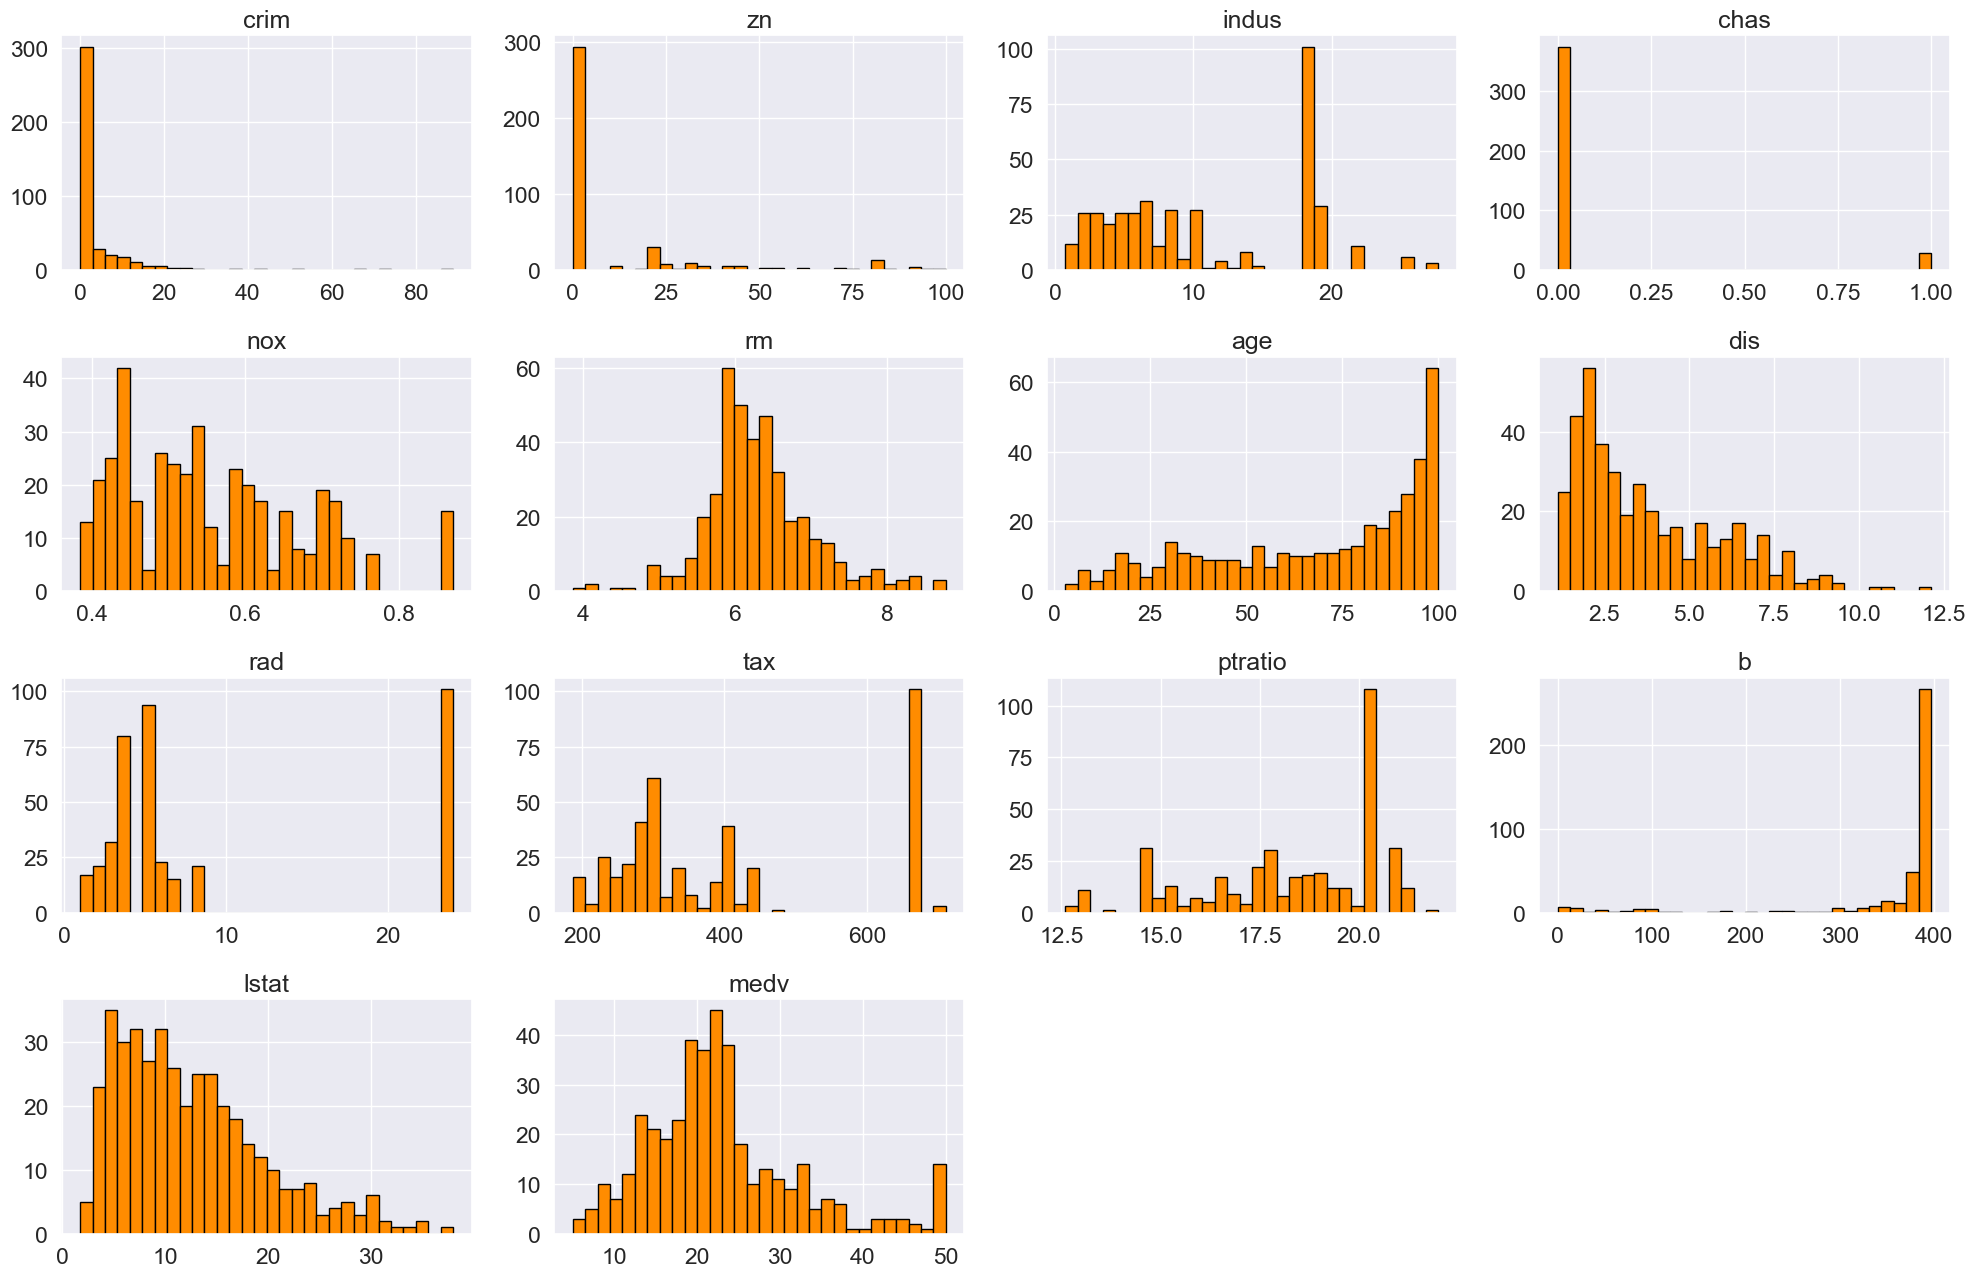

In [242]:
color = '#FF8C00'

# grid size
nrows, ncols = 5, 4  # adjust for your number of features

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

# Plot each numerical feature
for i, ax in enumerate(axes):
    if i >= len(df.columns):
        ax.set_visible(False)  # hide unesed plots
        continue
    ax.hist(df.iloc[:, i], bins=30, color=color, edgecolor='black')
    ax.set_title(df.columns[i])

plt.tight_layout()
plt.show()

In [243]:
from sklearn.preprocessing import MinMaxScaler 

In [244]:
scaler = MinMaxScaler()

In [245]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

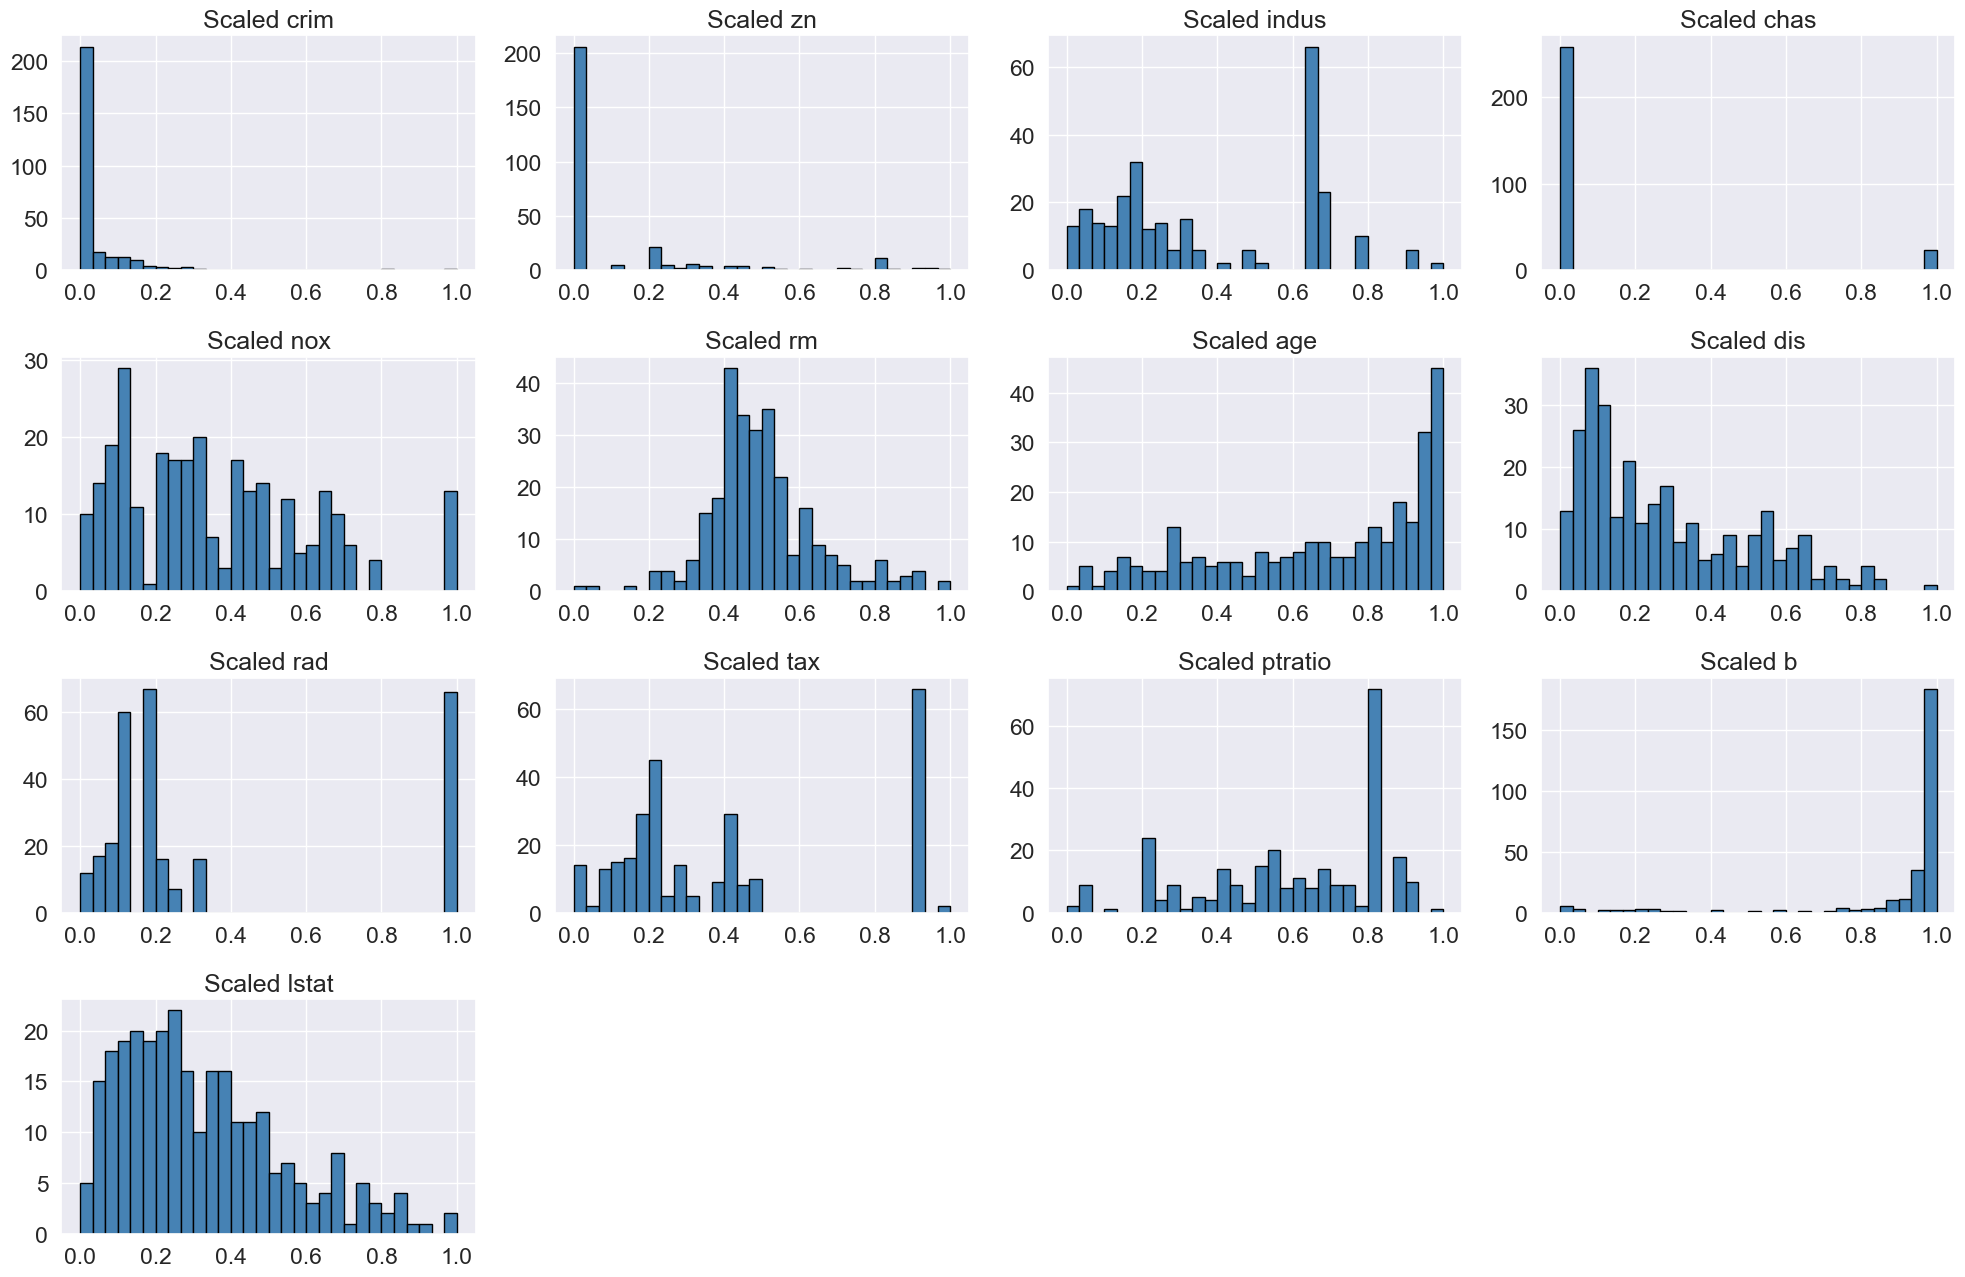

In [246]:
color = '#4682B4'

nrows, ncols = 5, 4

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

for i, ax in enumerate(axes):
    if i >= X_train_scaled.shape[1]:
        ax.set_visible(False)
        continue
    ax.hist(X_train_scaled[:, i], bins=30, color=color, edgecolor='black')
    ax.set_title(f'Scaled {df.columns[i]}')

plt.tight_layout()
plt.show()

In [247]:
xgbr = xgb.XGBRegressor()
xgbr.fit(X_train_scaled, y_train)

predictions_xgb_2 = xgbr.predict(X_test_scaled)

In [248]:
r2_3_7 = r2_score(y_test, predictions_xgb_2)
RMSE_3_7 = mean_squared_error(y_test, predictions_xgb_2, squared=False)
MSE_3_7 = mean_squared_error(y_test, predictions_xgb_2)
MAE_3_7 = mean_absolute_error(y_test, predictions_xgb_2)

#Printing the results
print("R2 = ", round(r2_3_7, 4))
print("RMSE = ", round(RMSE_3_7, 4))
print("The value of the metric MSE is ", round(MSE_3_7, 4))
print("MAE = ", round(MAE_3_7, 4))

R2 =  0.8615
RMSE =  3.3034
The value of the metric MSE is  10.9124
MAE =  2.3678


/opt/anaconda3/envs/ironhack/lib/python3.13/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


<h2 style="color: #FF6347;">Standardization with StandardScaler</h2>

In [249]:
from sklearn.preprocessing import StandardScaler

In [250]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [251]:
xgbr.fit(X_train_scaled, y_train)
predictions_xgb_2 = xgbr.predict(X_test_scaled)

In [252]:
r2_3_7 = r2_score(y_test, predictions_xgb_2)
RMSE_3_7 = mean_squared_error(y_test, predictions_xgb_2, squared=False)
MSE_3_7 = mean_squared_error(y_test, predictions_xgb_2)
MAE_3_7 = mean_absolute_error(y_test, predictions_xgb_2)

#Printing the results
print("R2 = ", round(r2_3_7, 4))
print("RMSE = ", round(RMSE_3_7, 4))
print("The value of the metric MSE is ", round(MSE_3_7, 4))
print("MAE = ", round(MAE_3_7, 4))

R2 =  0.8615
RMSE =  3.3034
The value of the metric MSE is  10.9124
MAE =  2.3678


/opt/anaconda3/envs/ironhack/lib/python3.13/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


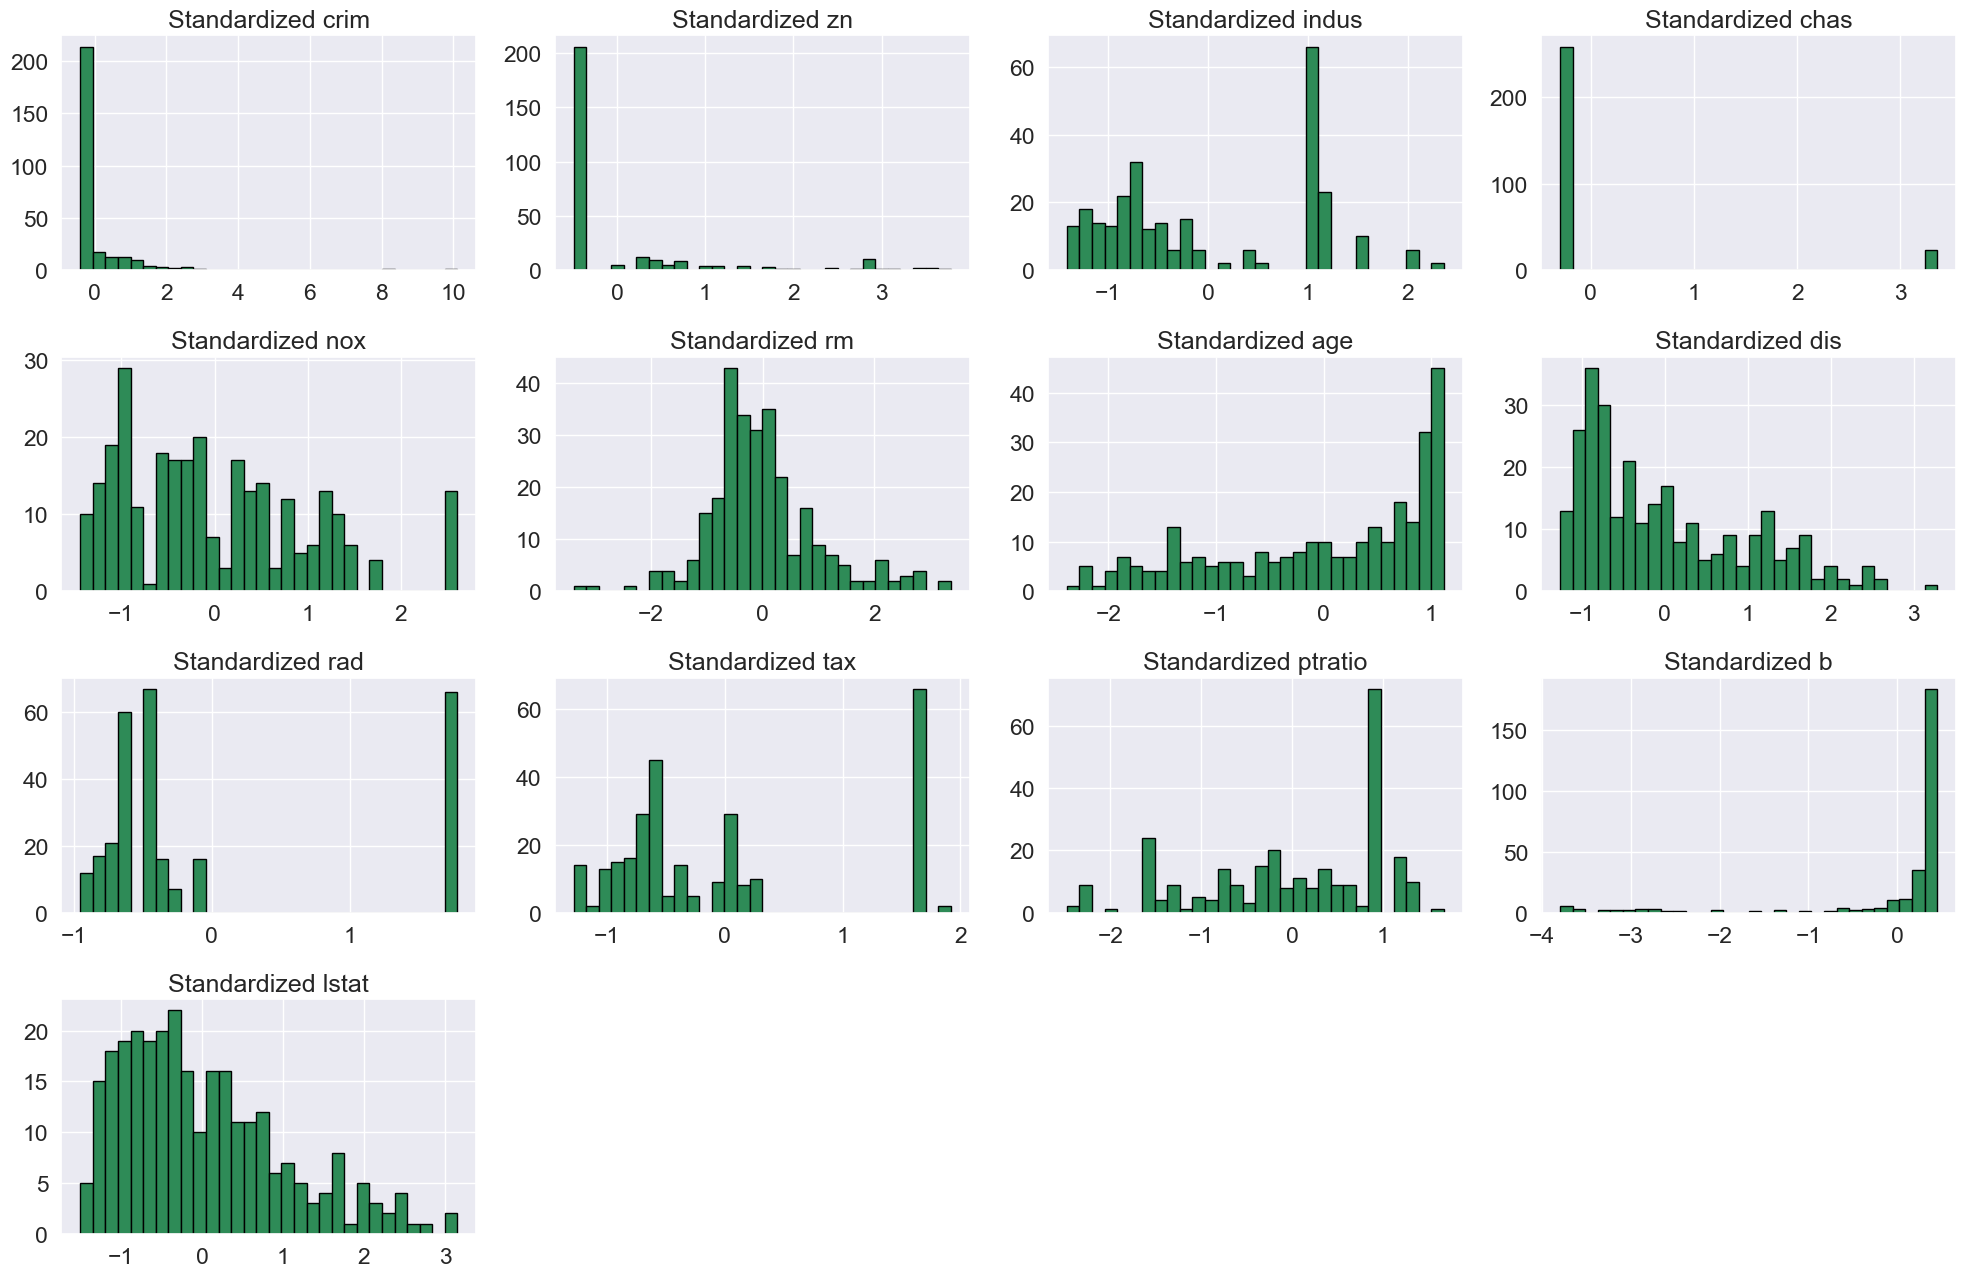

In [253]:
color = '#2E8B57'

nrows, ncols = 5, 4

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

for i, ax in enumerate(axes):
    if i >= X_train_scaled.shape[1]:
        ax.set_visible(False)
        continue
    ax.hist(X_train_scaled[:, i], bins=30, color=color, edgecolor='black')
    ax.set_title(f'Standardized {df.columns[i]}')

plt.tight_layout()
plt.show()

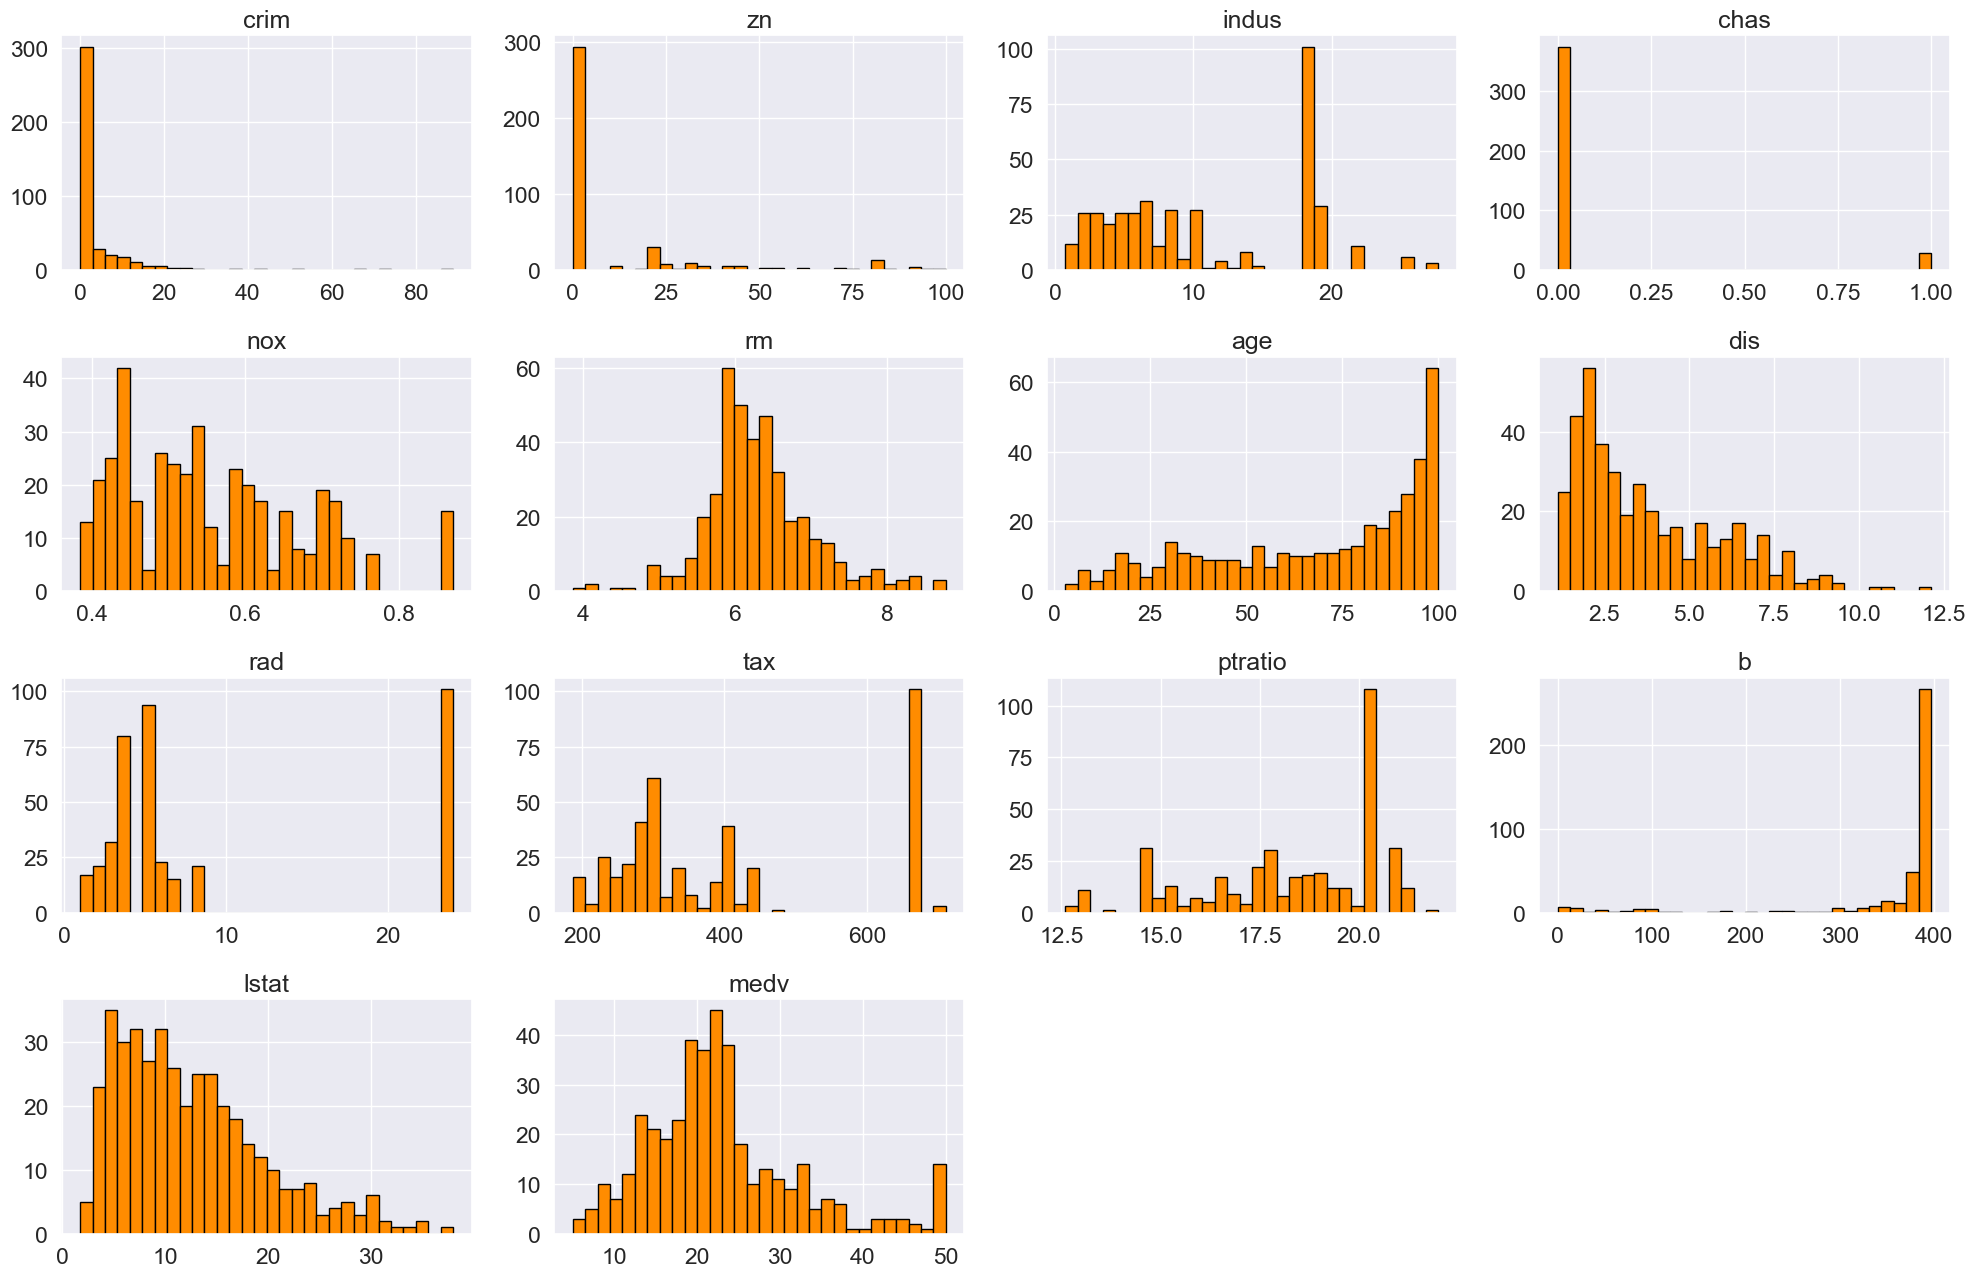

In [254]:
color = '#FF8C00'

# grid size
nrows, ncols = 5, 4  # adjust for your number of features

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

# Plot each numerical feature
for i, ax in enumerate(axes):
    if i >= len(df.columns):
        ax.set_visible(False)  # hide unesed plots
        continue
    ax.hist(df.iloc[:, i], bins=30, color=color, edgecolor='black')
    ax.set_title(df.columns[i])

plt.tight_layout()
plt.show()

<h2 style="color: #FF6347;">Normalization with Log Transform</h2>

In [259]:
X_train_scaled = np.log1p(X_train).to_numpy()
X_test_scaled = np.log1p(X_test).to_numpy()

In [260]:
xgbr.fit(X_train_scaled, y_train)
predictions_xgb_2 = xgbr.predict(X_test_scaled)

In [261]:
r2_3_7 = r2_score(y_test, predictions_xgb_2)
RMSE_3_7 = mean_squared_error(y_test, predictions_xgb_2, squared=False)
MSE_3_7 = mean_squared_error(y_test, predictions_xgb_2)
MAE_3_7 = mean_absolute_error(y_test, predictions_xgb_2)

#Printing the results
print("R2 = ", round(r2_3_7, 4))
print("RMSE = ", round(RMSE_3_7, 4))
print("The value of the metric MSE is ", round(MSE_3_7, 4))
print("MAE = ", round(MAE_3_7, 4))

R2 =  0.8615
RMSE =  3.3034
The value of the metric MSE is  10.9124
MAE =  2.3678


/opt/anaconda3/envs/ironhack/lib/python3.13/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


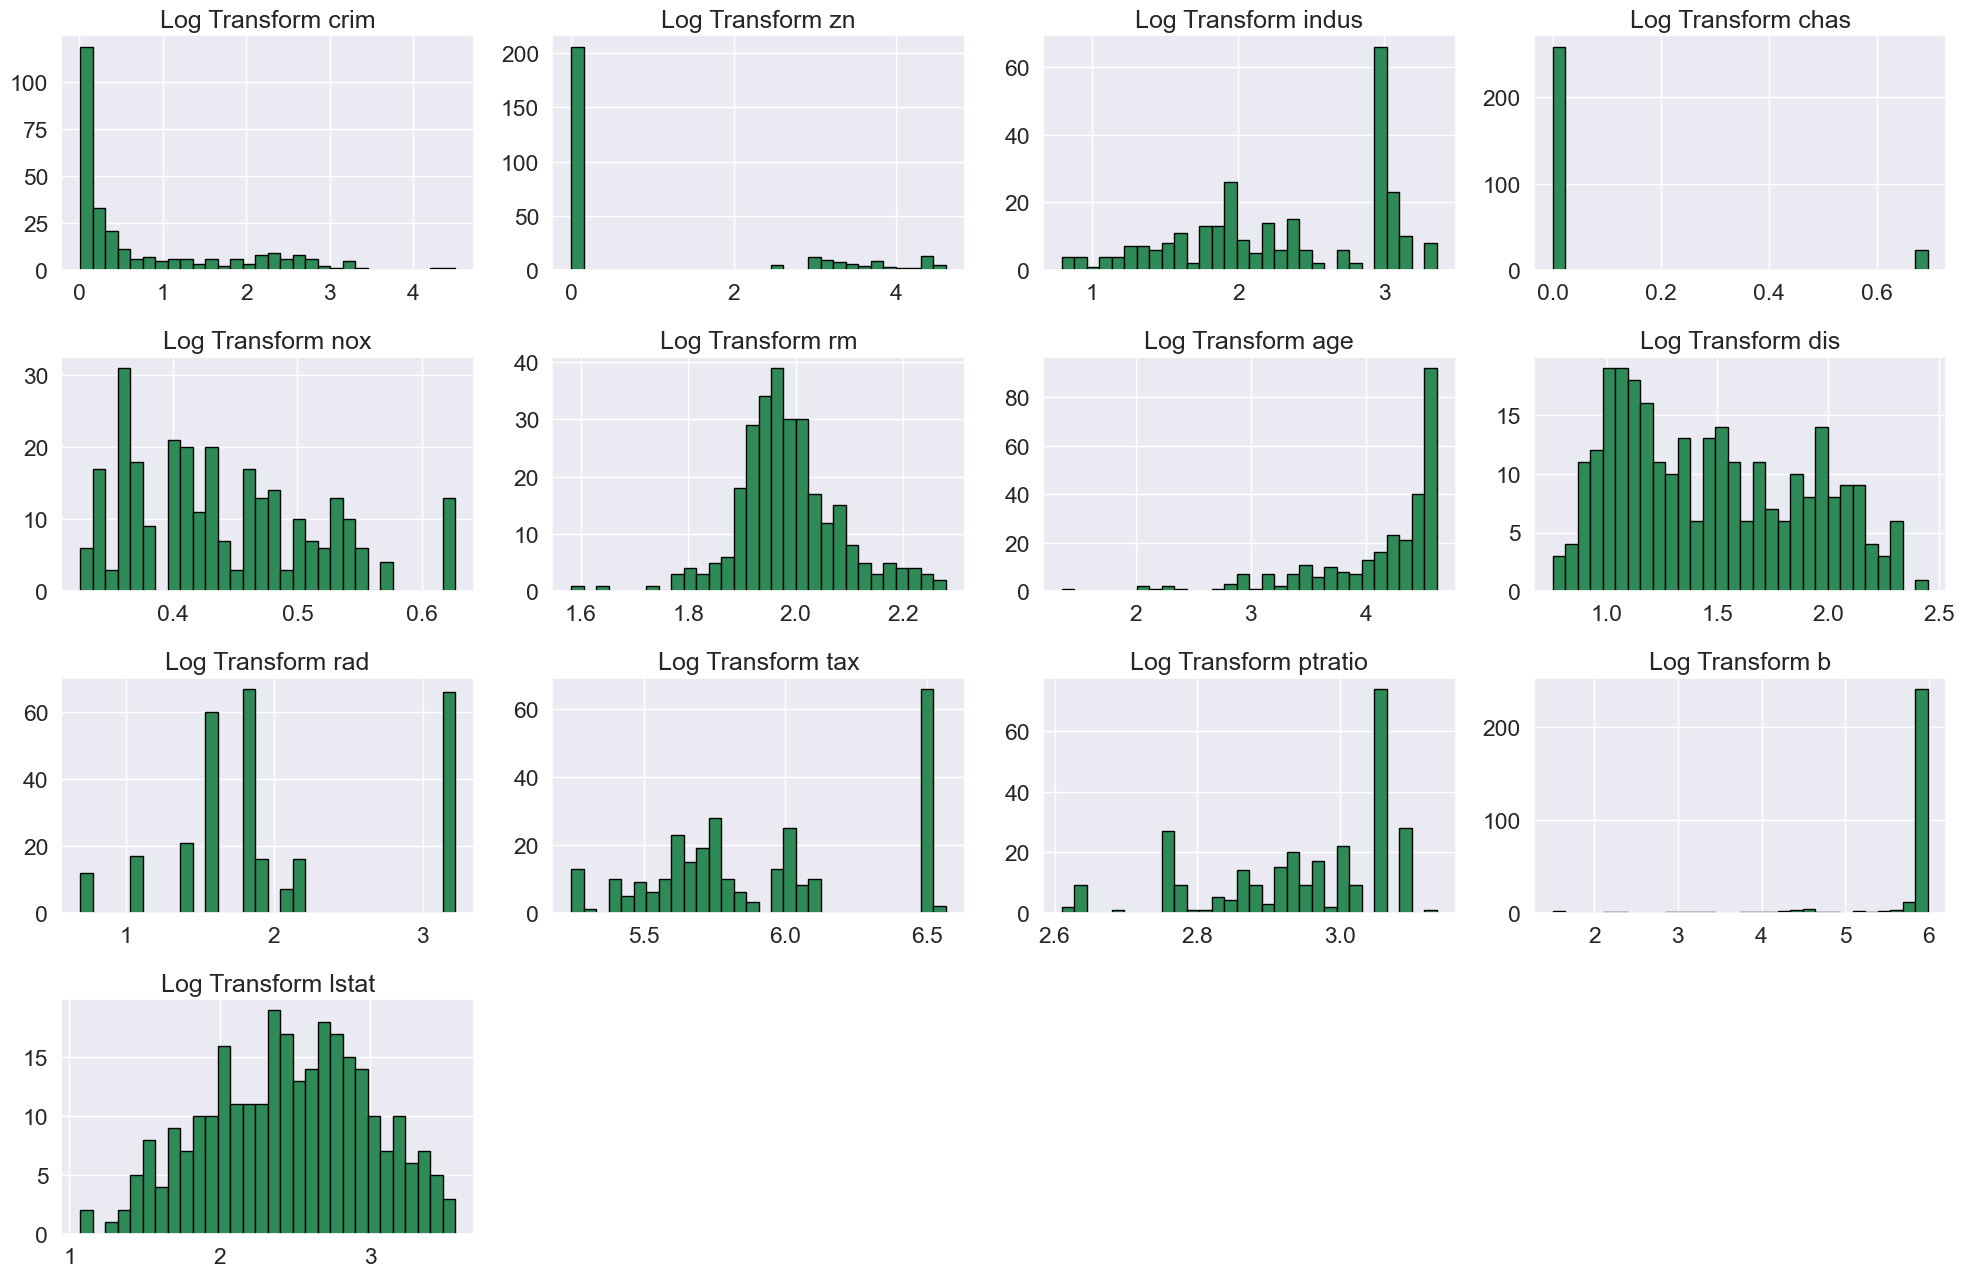

In [263]:
color = '#2E8B57'

nrows, ncols = 5, 4

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

for i, ax in enumerate(axes):
    if i >= X_train_scaled.shape[1]:
        ax.set_visible(False)
        continue
    ax.hist(X_train_scaled[:, i], bins=30, color=color, edgecolor='black')
    ax.set_title(f'Log Transform {df.columns[i]}')

plt.tight_layout()
plt.show()

<h1 style="color: #FF8C00;">Reporting</h1>

In [ ]:
## dataframe with actual vs predictions
eval_df

,actual,pred,dif
70,21.0,22.792939,1.792939
218,20.4,21.418580,1.018580
384,19.2,21.626212,2.426212
33,16.1,20.528998,4.428998
42,8.5,6.398059,2.101941
...,...,...,...
312,50.0,38.103111,11.896889
60,21.7,21.390887,0.309113
79,13.8,4.767872,9.032128
329,13.5,13.708853,0.208853


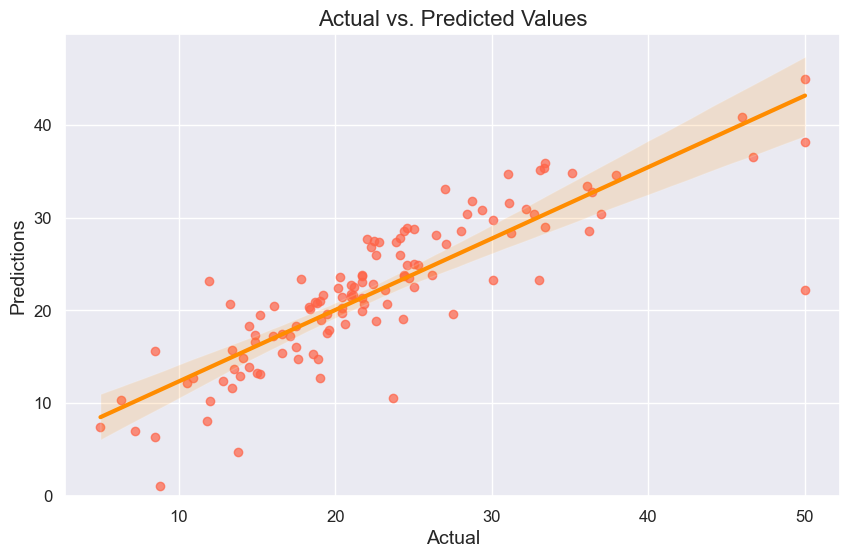

In [ ]:
scatter_color = "#FF6347"
line_color = "#FF8C00"

plt.figure(figsize=(10, 6))

sns.regplot(x='actual', y='pred', data=eval_df,
            scatter_kws={"color": scatter_color, "alpha": 0.7},
            line_kws={"color": line_color, "linewidth": 3})

plt.ylim(bottom=0)
plt.title('Actual vs. Predicted Values', fontsize=16)
plt.xlabel('Actual', fontsize=14)
plt.ylabel('Predictions', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()